# 2D Mass Spring System

In [1]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

## Problem Statement

A flat object slides over a flat surface. The object is attached to one end of a spring and the spring is fixed at the other end. Construct a mathematical model of the motion of the object.

## Variables and Parameters

| Description | Symbol | Dimensions | Type |
| :---: | :---: | :---: | :---: |
| position of object in $x$-direction | $x$ | L | dependent variable |
| position of object $y$-direction | $y$ | L | dependent variable |
| time | $t$ | T | independent variable |
| mass of the object | $m$ | M | parameter |
| spring constant | $k$ | MT<sup>-2<sup> | parameter |
| equilibrium length of the spring | $L$ | L | parameter |

## Assumptions and Constraints

* no friction, drag or damping
* one end of the spring is fixed at the origin $(0,0)$ and the other end is attached to the mass a position $(x(t),y(t))$
* the mass of the spring is negligible

## Construction

The stretch/compression in the spring is the difference of the equilibrium length and the distance of the mass from origin. In other words, the stretch/compression in the spring is given by

$$
L - \| \mathbf{x}(t) \|
$$

where $\| \mathbf{x}(t) \| = \sqrt{ x(t)^2 + y(t)^2 }$. The spring force acts in the direction from the mass to the origin. The corresponding unit vector is

$$
\frac{\mathbf{x}(t)}{\| \mathbf{x}(t) \|}
$$

Therefore the spring force is given by

$$
\mathbf{F}_s = k \left( L - \| \mathbf{x}(t) \| \right) \frac{\mathbf{x}(t)}{\| \mathbf{x}(t) \|} = k \left( \frac{L}{\| \mathbf{x}(t) \|} - 1 \right) \mathbf{x}(t)
$$

Apply Newton's second law of motion:

$$
\begin{align*}
m \frac{d^2x}{dt^2} &= \frac{k L x}{\sqrt{ x^2 + y^2 }} - k x \\
m \frac{d^2y}{dt^2} &= \frac{k L y}{\sqrt{ x^2 + y^2 }} - k y
\end{align*}
$$

Apply the nondimensionalization procedure. Let $x = [x]x^*$, $y = [y]y^*$ and $t = [t]t^*$. We should choose $[x] = [y]$ since there is no reason to treat the two directions differently and so let $[c] = [x] = [y]$. Make the substitutions:

$$
\begin{align*}
\frac{m[c]}{[t]^2} \frac{d^2 x^*}{dt^{*2}} &= \frac{k L [c]x^*}{[c] \sqrt{ x^{*2} + y^{*2} }} - k [c] x^* \\
\frac{m[c]}{[t]^2} \frac{d^2 y^*}{dt^{*2}} &= \frac{k L [c]y^*}{[c] \sqrt{ x^{*2} + y^{*2} }} - k [c] y^*
\end{align*}
$$

Divide by the highest order coefficient $m[c]/[t]^2$ to find:

$$
\begin{align*}
\frac{d^2 x^*}{dt^{*2}} &= \frac{k L [t]^2 x^*}{ m [c] \sqrt{ x^{*2} + y^{*2} }} - \frac{k [t]^2 x^*}{m} \\
\frac{d^2 y^*}{dt^{*2}} &= \frac{k L [t]^2 y^*}{ m [c] \sqrt{ x^{*2} + y^{*2} }} - \frac{k [t]^2 y^*}{m} \\
\end{align*}
$$

Choose scaling factors

$$
[t] = \sqrt{\frac{m}{k}} \hspace{20mm} [c] = L
$$

and find

$$
\begin{align*}
\frac{d^2 x^*}{dt^{*2}} &= \frac{x^*}{ \sqrt{ x^{*2} + y^{*2} }} - x^* \\
\frac{d^2 y^*}{dt^{*2}} &= \frac{y^*}{ \sqrt{ x^{*2} + y^{*2} }} - y^*
\end{align*}
$$

Introduce new variables

$$
u_0 = x^* \ , \ \ u_1 = \frac{dx^*}{dt^*} \ , \ \ u_2 = y^* \ , \ \ u_3 = \frac{dy^*}{dt^*}
$$

and write the system as a first order system of equation

$$
\begin{align*}
\frac{du_0}{dt^*} &= u_1 \\
\frac{du_1}{dt^*} &= \frac{u_0}{ \sqrt{ u_0^2 + u_2^2 }} - u_0 \\
\frac{du_2}{dt^*} &= u_3 \\
\frac{du_3}{dt^*} &= \frac{u_2}{ \sqrt{ u_0^2 + u_2^2 }} - u_2
\end{align*}
$$

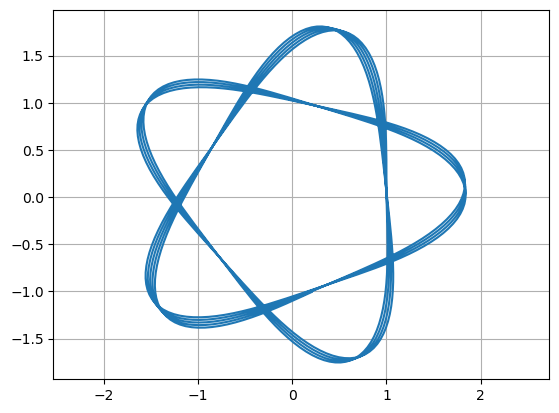

In [2]:
def f(u,t):
    dudt = np.array([0.,0.,0.,0.])
    D = np.sqrt(u[0]**2 + u[2]**2)
    dudt[0] = u[1]
    dudt[1] = u[0]/D - u[0]
    dudt[2] = u[3]
    dudt[3] = u[2]/D - u[2]
    return dudt

u0 = [1.,0.,0.,1.]
t = np.linspace(0,100,1000)
U = spi.odeint(f,u0,t)
plt.plot(U[:,0],U[:,2])
plt.grid(True), plt.axis('equal')
plt.show()

## Analysis

*Under construction*